In [ ]:
import pandas as pd
import numpy as num
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.xlsx to BIKE DETAILS.xlsx


In [ ]:
data = pd.read_excel('BIKE DETAILS.xlsx')

In [ ]:
data.head(5)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
data.tail(5)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [ ]:
data.size

7427

In [ ]:
data.shape

(1061, 7)

In [ ]:
data.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1056,False
1057,False
1058,False
1059,False


In [ ]:
data.duplicated().sum()

np.int64(6)

In [ ]:
data.drop_duplicates()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
data.duplicated().sum()

np.int64(6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [ ]:
data.nunique()

,0
name,276
selling_price,130
year,28
seller_type,2
owner,4
km_driven,304
ex_showroom_price,230


1.What is the range of selling prices in the dataset?

In [ ]:
max_price = data['selling_price'].max()
min_price = data['selling_price'].min()
price_range = max_price - min_price
print(f"The range of selling prices: {price_range}")

The range of selling prices: 755000


2.What is the median selling price for bikes in the dataset?

In [ ]:
median_price = data['selling_price'].median()
print(f"The median selling price for bikes in the dataset: {median_price}")

The median selling price for bikes in the dataset: 45000.0


3.What is the most common seller type?

In [ ]:
most_common_seller = data['seller_type'].value_counts().mode()[0]
print(f"The most common seller type: {most_common_seller}")

The most common seller type: 6


5.What is the average km_driven value for each ownership type?

In [ ]:
data['km_driven'] = data['km_driven'].replace(',', '', regex=True).astype(int)
average_km_by_ownership = data.groupby('owner')['km_driven'].mean()
print("Average km_driven for each ownership type:")
print(average_km_by_ownership)

Average km_driven for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6.What proportion of bikes are from the year 2015 or older?

In [ ]:
# Filter bikes from year 2015 or older
# Assuming the column containing the year is named 'year' (lowercase)
bikes_2015_or_older = data[data['year'] <= 2015]

# Calculate the proportion
# Calculate proportion against the total data if there isn't a 'Type' column
proportion = len(bikes_2015_or_older) / len(data)

print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 56.64%


7. What is the trend of missing values across the dataset?

In [ ]:
# Count missing values in each column
missing_counts = data.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_counts / len(data)) * 100

# Combine both into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percentage
})

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

print("Missing Value Trend:")
print(missing_summary) # Added print statement to display the summary

Missing Value Trend:
                   Missing Values  Percentage (%)
ex_showroom_price             435       40.999057


8.What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
# Find the row with the highest ex_showroom_price
max_price_row = data.loc[data['ex_showroom_price'].idxmax()]

# Display the result
bike_name = max_price_row['name']       # or adjust column if bike name is stored differently
max_price = max_price_row['ex_showroom_price']

print(f"Highest ex_showroom_price is ₹{max_price:,} for the bike: {bike_name}")

Highest ex_showroom_price is ₹1,278,000.0 for the bike: Harley-Davidson Street Bob


9.What is the total number of bikes listed by each seller type?

In [ ]:
# Assuming all entries in the dataset are bikes, the filtering step is not needed.
# If your dataset contains other vehicle types and there's a column to distinguish them,
# replace 'Your_Type_Column_Name' with the actual name of that column.
# For example: bikes_df = data[data['Your_Type_Column_Name'] == 'Bike']

# Group by seller type and count bikes
bike_counts_by_seller = data['seller_type'].value_counts()

# Display the result
print("Total number of bikes listed by each seller type:")
print(bike_counts_by_seller)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


10.B What is the relationship between selling_price and km_driven for first-owner bikes?

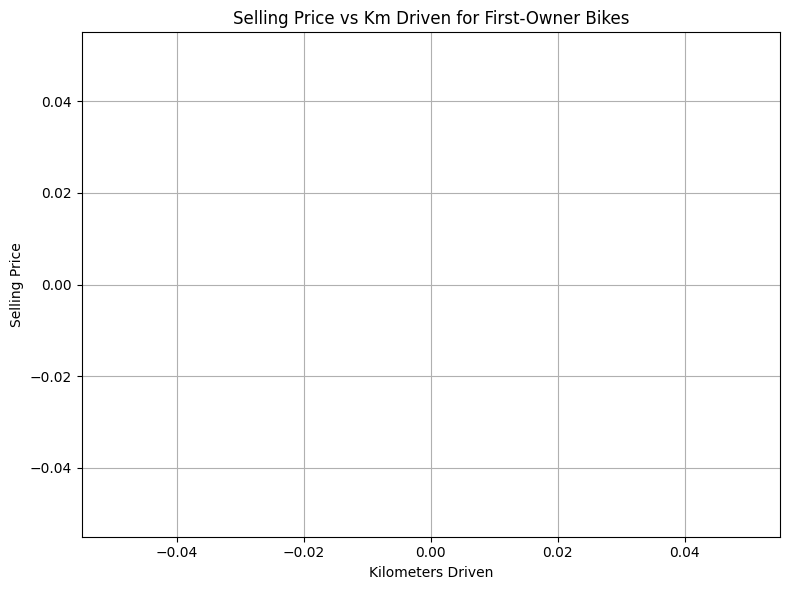

Correlation between selling_price and km_driven: nan


In [ ]:
# Assuming all entries in the dataset are bikes and there is no 'Type' column
# Filter for first-owner bikes
first_owner_bikes = data[data['owner'] == 'First Owner']  # Use 'data' instead of 'df' and remove filtering by 'Type'

# Scatter plot: Selling Price vs. Km Driven
plt.figure(figsize=(8, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Selling Price vs Km Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print correlation
correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print(f"Correlation between selling_price and km_driven: {correlation:.2f}")

11.B Identify and remove outliers in the km_driven column using the IQR method?

In [ ]:
# Clean km_driven if needed
# Use 'data' instead of 'df'
data['km_driven'] = data['km_driven'].replace(',', '', regex=True).astype(int)

# Step 1: Calculate Q1, Q3, and IQR
# Use 'data' instead of 'df'
Q1 = data['km_driven'].quantile(0.25)
Q3 = data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
# Use 'data' instead of 'df'
outliers = data[(data['km_driven'] < lower_bound) | (data['km_driven'] > upper_bound)]
print(f"Number of outliers in km_driven: {outliers.shape[0]}")

# Step 4: Remove outliers
# Use 'data' instead of 'df'
data_no_outliers = data[(data['km_driven'] >= lower_bound) & (data['km_driven'] <= upper_bound)]

# Use 'data' instead of 'df' in print statements
print(f"Original dataset size: {data.shape[0]}")
print(f"Dataset size after removing outliers: {data_no_outliers.shape[0]}")

Number of outliers in km_driven: 39
Original dataset size: 1061
Dataset size after removing outliers: 1022


12.Perform a bivariate analysis to visualize the relationship between year and selling_price?

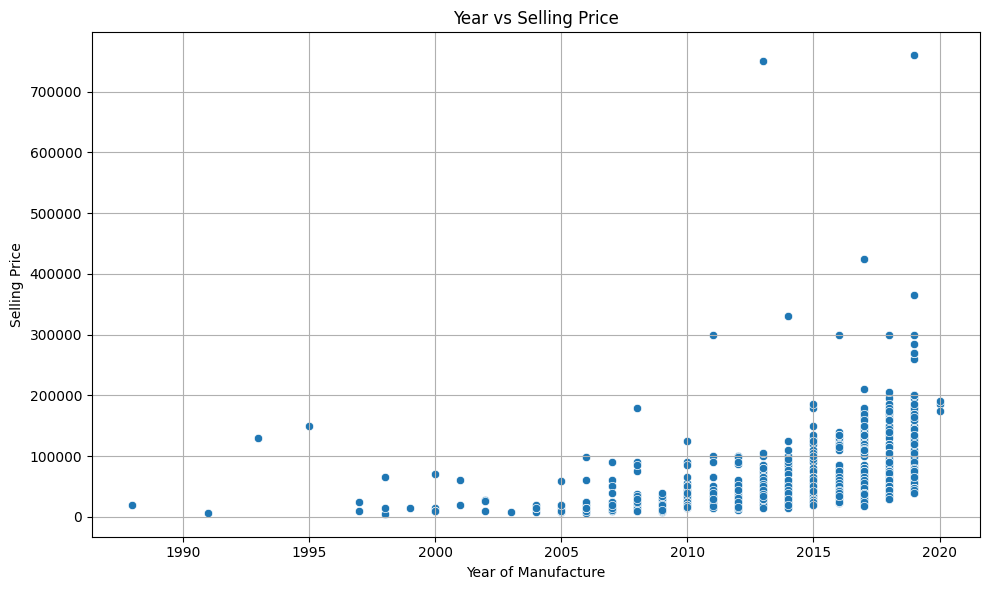

In [ ]:
# Convert 'year' to integer if needed
data['year'] = data['year'].astype(int)

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='year', y='selling_price')
plt.title('Year vs Selling Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

Average selling price by bike age:
    age  selling_price
0     5  183333.333333
1     6  119689.511628
2     7   87660.374046
3     8   78894.736842
4     9   58469.018692
5    10   56500.000000
6    11   48668.131868
7    12   51136.986301
8    13   35748.400000
9    14   35655.721311
10   15   31793.333333
11   16   22267.857143
12   17   34289.285714
13   18   24927.586207
14   19   23380.000000
15   20   16978.571429
16   21   15100.000000
17   22    8000.000000
18   23   20666.666667
19   24   40000.000000
20   25   20833.333333
21   26   15000.000000
22   27   28333.333333
23   28   17500.000000
24   30  150000.000000
25   32  130000.000000
26   34    6000.000000
27   37   20000.000000


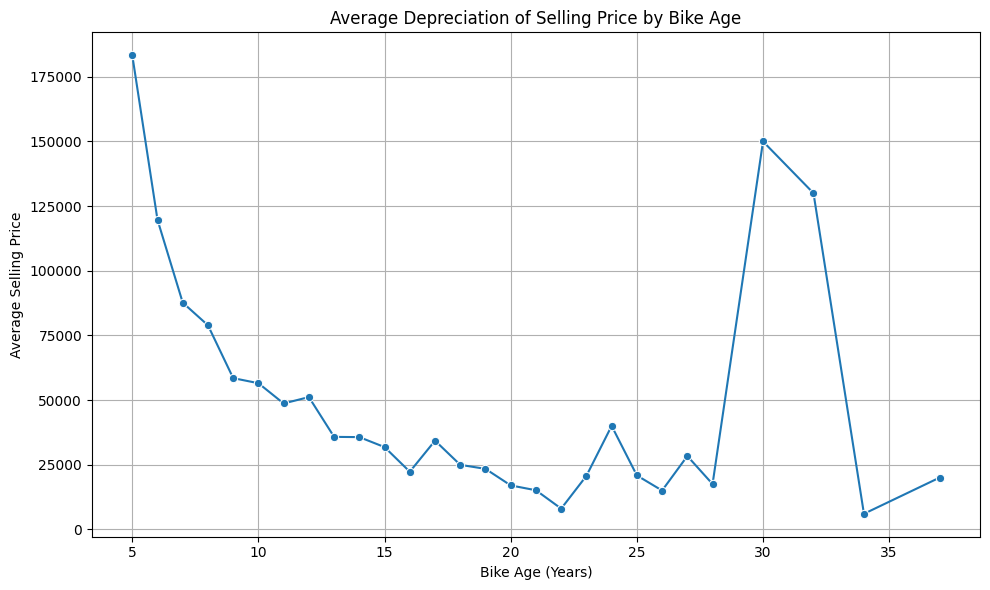

In [ ]:
# Set current year (update if needed)
current_year = 2025

# Calculate age of each bike
# Use 'data' instead of 'df'
data['age'] = current_year - data['year']

# Filter for bikes only (optional)
# Check if 'Type' column exists before attempting to filter. If not,
# remove the filtering line or adjust the column name as necessary.
if 'Type' in data.columns:
    bikes_df = data[data['Type'] == 'Bike']  # Adjust column name if needed
else:
    bikes_df = data # Assume all entries are bikes if 'Type' column is missing


# Group by age and calculate average selling price
avg_price_by_age = bikes_df.groupby('age')['selling_price'].mean().reset_index()

# Display the result
print("Average selling price by bike age:")
print(avg_price_by_age)

# Optional: Plot depreciation
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_age, x='age', y='selling_price', marker='o')
plt.title('Average Depreciation of Selling Price by Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

14.Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
# Filter only bikes (adjust column name if needed)
# The previous code assumed a 'Type' column which caused a KeyError.
# Based on the traceback and previous cell's logic, we will assume
# all entries in the 'data' DataFrame are bikes if a 'Type' column doesn't exist.
# We will use the entire 'data' DataFrame for this calculation.
bikes_data = data

# Calculate average selling price per year
# Using 'data' directly as we are assuming all entries are bikes
year_avg_price = data.groupby('year')['selling_price'].mean().reset_index()
year_avg_price.columns = ['year', 'avg_selling_price']

# Merge average price back to original dataframe
# Merging with the original 'data' DataFrame
bikes_with_avg = data.merge(year_avg_price, on='year')

# Identify bikes priced significantly above average (e.g., > 1.5× year average)
outliers = bikes_with_avg[bikes_with_avg['selling_price'] > 1.5 * bikes_with_avg['avg_selling_price']]

# Show the results
print("Bikes priced significantly above the average for their manufacturing year:")
print(outliers[['name', 'year', 'selling_price', 'avg_selling_price']])

Bikes priced significantly above the average for their manufacturing year:
                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     avg_selling_price  
2         87660.374046  
7         34289.285714  
13       119689.511628  
18        87660.374046  
23     

15.Develop a correlation matrix for numeric columns and visualize it using a heatmap?

Correlation Matrix:
                   selling_price      year  km_driven  ex_showroom_price  \
selling_price           1.000000  0.402188  -0.212937           0.918583   
year                    0.402188  1.000000  -0.288675           0.126378   
km_driven              -0.212937 -0.288675   1.000000          -0.122011   
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000   
age                    -0.402188 -1.000000   0.288675          -0.126378   

                        age  
selling_price     -0.402188  
year              -1.000000  
km_driven          0.288675  
ex_showroom_price -0.126378  
age                1.000000  


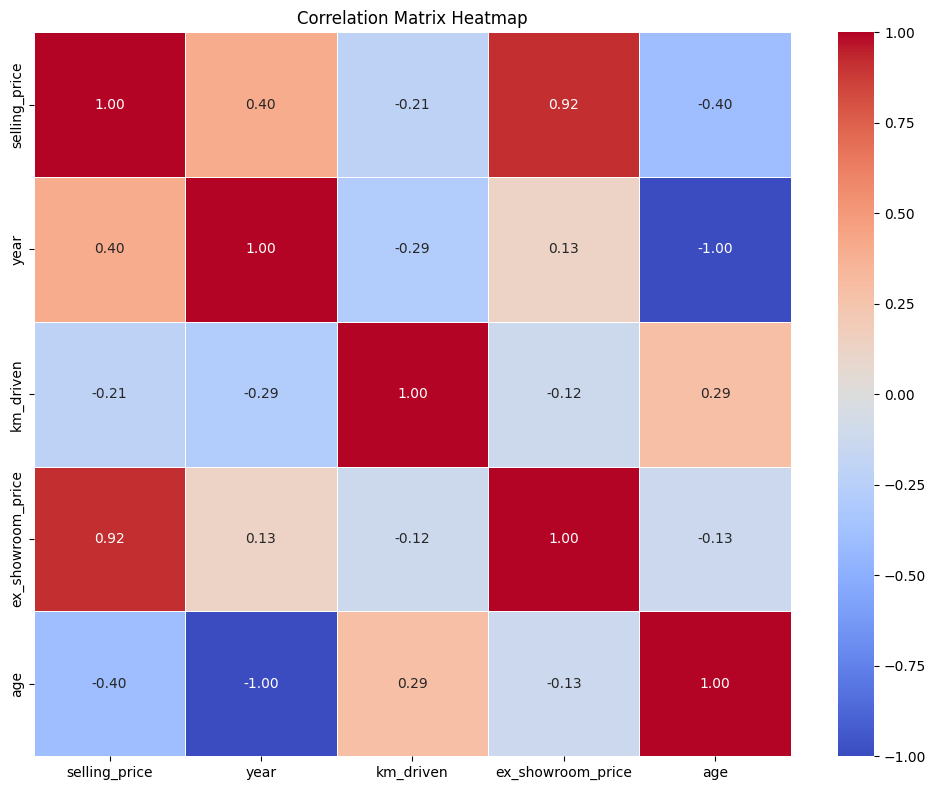

In [ ]:
# Clean km_driven and ex_showroom_price columns if necessary
# Use 'data' instead of 'df'
data['km_driven'] = data['km_driven'].replace(',', '', regex=True).astype(int)
if 'ex_showroom_price' in data.columns: # Use 'data' instead of 'df' here too
    data['ex_showroom_price'] = data['ex_showroom_price'].replace('[\₹,]', '', regex=True).astype(float)

# Include age if you want it in the correlation
data['age'] = 2025 - data['year']

# Select only numeric columns
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()